# Read coords from existing DEG

In [1]:
import deg

# read graph from drive
graph_file = "G:/My Drive/HTW/PhD/2DGraph/automatic/L2_K4_AddK10Eps0.2High_SwapK10-0StepEps0.001LowPath5Rnd100+0_improveNonRNGAndSecondHalfOfNonPerfectEdges_RNGAddMinimalSwapAtStep0.add_rng_opt.deg"

graph_file = "G:/My Drive/HTW/PhD/2DGraph/V30_L2_K4_AddK8Eps0.2High_SwapK8-0StepEps0.001Low.deg"

# use features as coords
coords = deg.read_deg_vertices(graph_file)
print(coords.shape)
coords.head()

(30, 4)


id                 feature  color               geometry
0   0    [73.01615, 25.27309]  black  POINT (73.016 25.273)
1   1    [76.6436, 81.619644]  black   POINT (76.644 81.62)
2   2   [59.095734, 99.37522]  black  POINT (59.096 99.375)
3   3  [92.944084, 14.437962]  black  POINT (92.944 14.438)
4   4   [38.930744, 35.24164]  black  POINT (38.931 35.242)

s = coords.loc[5]  # Assuming s is the Series
index_label = s.index  # This returns the index label (e.g., 5 if it's an integer index)# Create random coords

In [2]:
from utils import create_random_coords

# example
coords = create_random_coords(n=41, scale=50, seed=7)
print(coords.shape)
coords.head()

(41, 4)


id                 feature  color                   geometry
0   0   [3.8154144, 38.99594]  black   POINT (3.81541 38.99594)
1   1   [21.920462, 36.17326]  black  POINT (21.92046 36.17326)
2   2  [48.899475, 26.924793]  black  POINT (48.89948 26.92479)
3   3  [25.056023, 3.6025567]  black   POINT (25.05602 3.60256)
4   4  [13.421949, 24.994125]  black  POINT (13.42195 24.99413)

# Create all graphs

In [3]:
from graphs import GraphKind, build_graphs, extract_features

# gdf: your GeoDataFrame with a 'features' column and point 'geometry'
# Build all graph kinds (base + DEG) with a chosen edges_per_vertex
all_kinds = list(GraphKind)
graphs = build_graphs(coords, kinds=all_kinds, edges_per_vertex=4)

# Optional: inspect results
for g in graphs:
    edges = g.edges
    print(f"{g.title}: edges={getattr(edges, 'shape', getattr(edges, '__len__', lambda: 'n/a')())[0]}")

C:\Users\Neiko\miniconda3\envs\city2graph\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


kNN Graph: edges=164
MST: edges=40
MRNG: edges=110
RNG: edges=46
GG: edges=67
DG: edges=112
DEGStream: edges=82
DEGHigh: edges=82
DEGLow: edges=82
DEGStreamChecked: edges=65
DEGHighChecked: edges=68
DEGLowChecked: edges=68
DEGStreamOpt: edges=69
DEGHighOpt: edges=73
DEGLowOpt: edges=71
DEGStreamOptChecked: edges=53
DEGHighOptChecked: edges=54
DEGLowOptChecked: edges=51


## Plot the Graphs

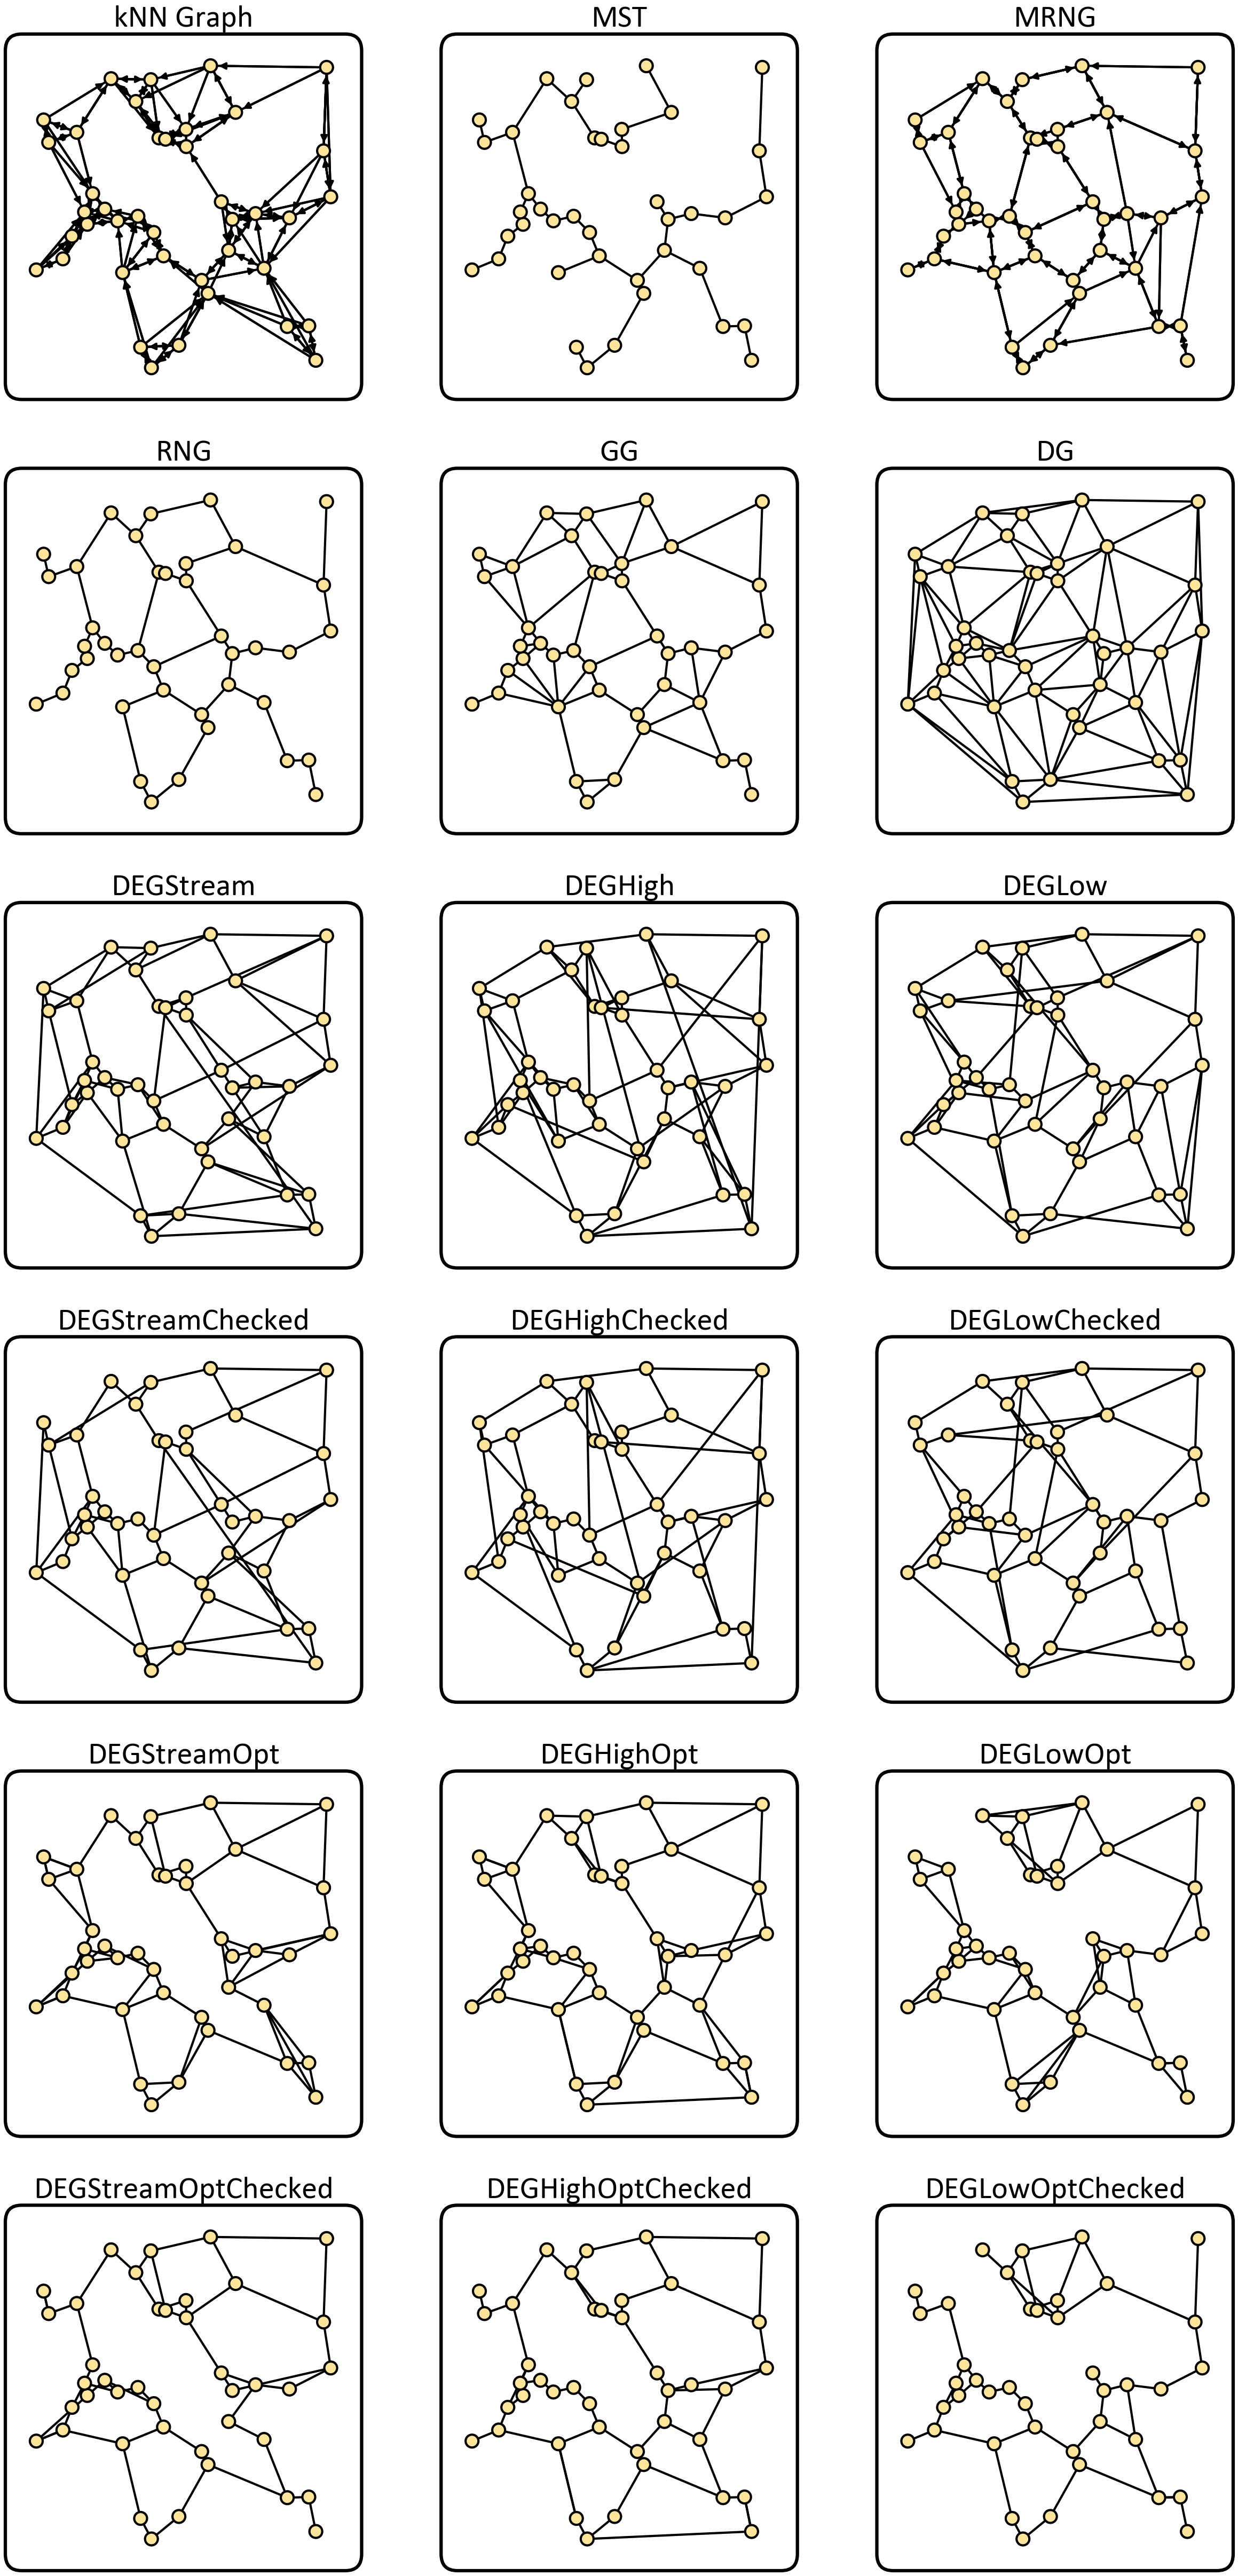

In [4]:
from plot import plot_graphs

# Example usage
plot_graphs(vertices=coords, graphs=graphs, bg_color="white", text_color="black", annotation_size=0, title_size=42, marker_size=300, border_color="black", edge_width=3, max_per_row=3, save_file="all_graph.svg")

# Edge Overlap

In [5]:
from evaluate import print_edge_overlap
from typing import Dict

by_kind: Dict[GraphKind, any] = {it.kind: it for it in graphs}
rng_edges = by_kind[GraphKind.RNG].edges

print_edge_overlap("KNN", rng_edges, by_kind[GraphKind.KNN].edges)
print_edge_overlap("MST", rng_edges, by_kind[GraphKind.MST].edges)
print_edge_overlap("MRNG", rng_edges, by_kind[GraphKind.MRNG].edges)
print_edge_overlap("DG",  rng_edges, by_kind[GraphKind.DG].edges)
print_edge_overlap("GG",  rng_edges, by_kind[GraphKind.GG].edges)

print_edge_overlap("DEGStream", rng_edges, by_kind[GraphKind.DEGStream].edges)
print_edge_overlap("DEGLow", rng_edges, by_kind[GraphKind.DEGLow].edges)
print_edge_overlap("DEGHigh", rng_edges, by_kind[GraphKind.DEGHigh].edges)

print_edge_overlap("DEGStreamOpt", rng_edges, by_kind[GraphKind.DEGStreamOpt].edges)
print_edge_overlap("DEGLowOpt", rng_edges, by_kind[GraphKind.DEGLowOpt].edges)
print_edge_overlap("DEGHighOpt", rng_edges, by_kind[GraphKind.DEGHighOpt].edges)

print_edge_overlap("DEGStreamRNGChecked", rng_edges, by_kind[GraphKind.DEGStreamRNGChecked].edges)
print_edge_overlap("DEGLowRNGChecked", rng_edges, by_kind[GraphKind.DEGLowRNGChecked].edges)
print_edge_overlap("DEGHighRNGChecked", rng_edges, by_kind[GraphKind.DEGHighRNGChecked].edges)

print_edge_overlap("DEGStreamOptRNGChecked", rng_edges, by_kind[GraphKind.DEGStreamOptRNGChecked].edges)
print_edge_overlap("DEGLowOptRNGChecked", rng_edges, by_kind[GraphKind.DEGLowOptRNGChecked].edges)
print_edge_overlap("DEGHighOptRNGChecked", rng_edges, by_kind[GraphKind.DEGHighOptRNGChecked].edges)

KNN       81/ 46 (176.09%)    81/164 ( 49.39%)  avg=  7.165
MST       40/ 46 ( 86.96%)    40/ 40 (100.00%)  avg=  5.316
MRNG      92/ 46 (200.00%)    92/110 ( 83.64%)  avg=  7.012
DG        46/ 46 (100.00%)    46/112 ( 41.07%)  avg=  9.592
GG        46/ 46 (100.00%)    46/ 67 ( 68.66%)  avg=  6.997
DEGStream  41/ 46 ( 89.13%)    41/ 82 ( 50.00%)  avg=  9.847
DEGLow    38/ 46 ( 82.61%)    38/ 82 ( 46.34%)  avg= 10.046
DEGHigh   40/ 46 ( 86.96%)    40/ 82 ( 48.78%)  avg= 11.191
DEGStreamOpt  39/ 46 ( 84.78%)    39/ 69 ( 56.52%)  avg=  7.400
DEGLowOpt  41/ 46 ( 89.13%)    41/ 71 ( 57.75%)  avg=  6.946
DEGHighOpt  43/ 46 ( 93.48%)    43/ 73 ( 58.90%)  avg=  7.396
DEGStreamRNGChecked  41/ 46 ( 89.13%)    41/ 65 ( 63.08%)  avg=  9.727
DEGLowRNGChecked  38/ 46 ( 82.61%)    38/ 68 ( 55.88%)  avg=  9.917
DEGHighRNGChecked  40/ 46 ( 86.96%)    40/ 68 ( 58.82%)  avg= 10.815
DEGStreamOptRNGChecked  39/ 46 ( 84.78%)    39/ 53 ( 73.58%)  avg=  6.841
DEGLowOptRNGChecked  41/ 46 ( 89.13%)    41/ 51 ( 

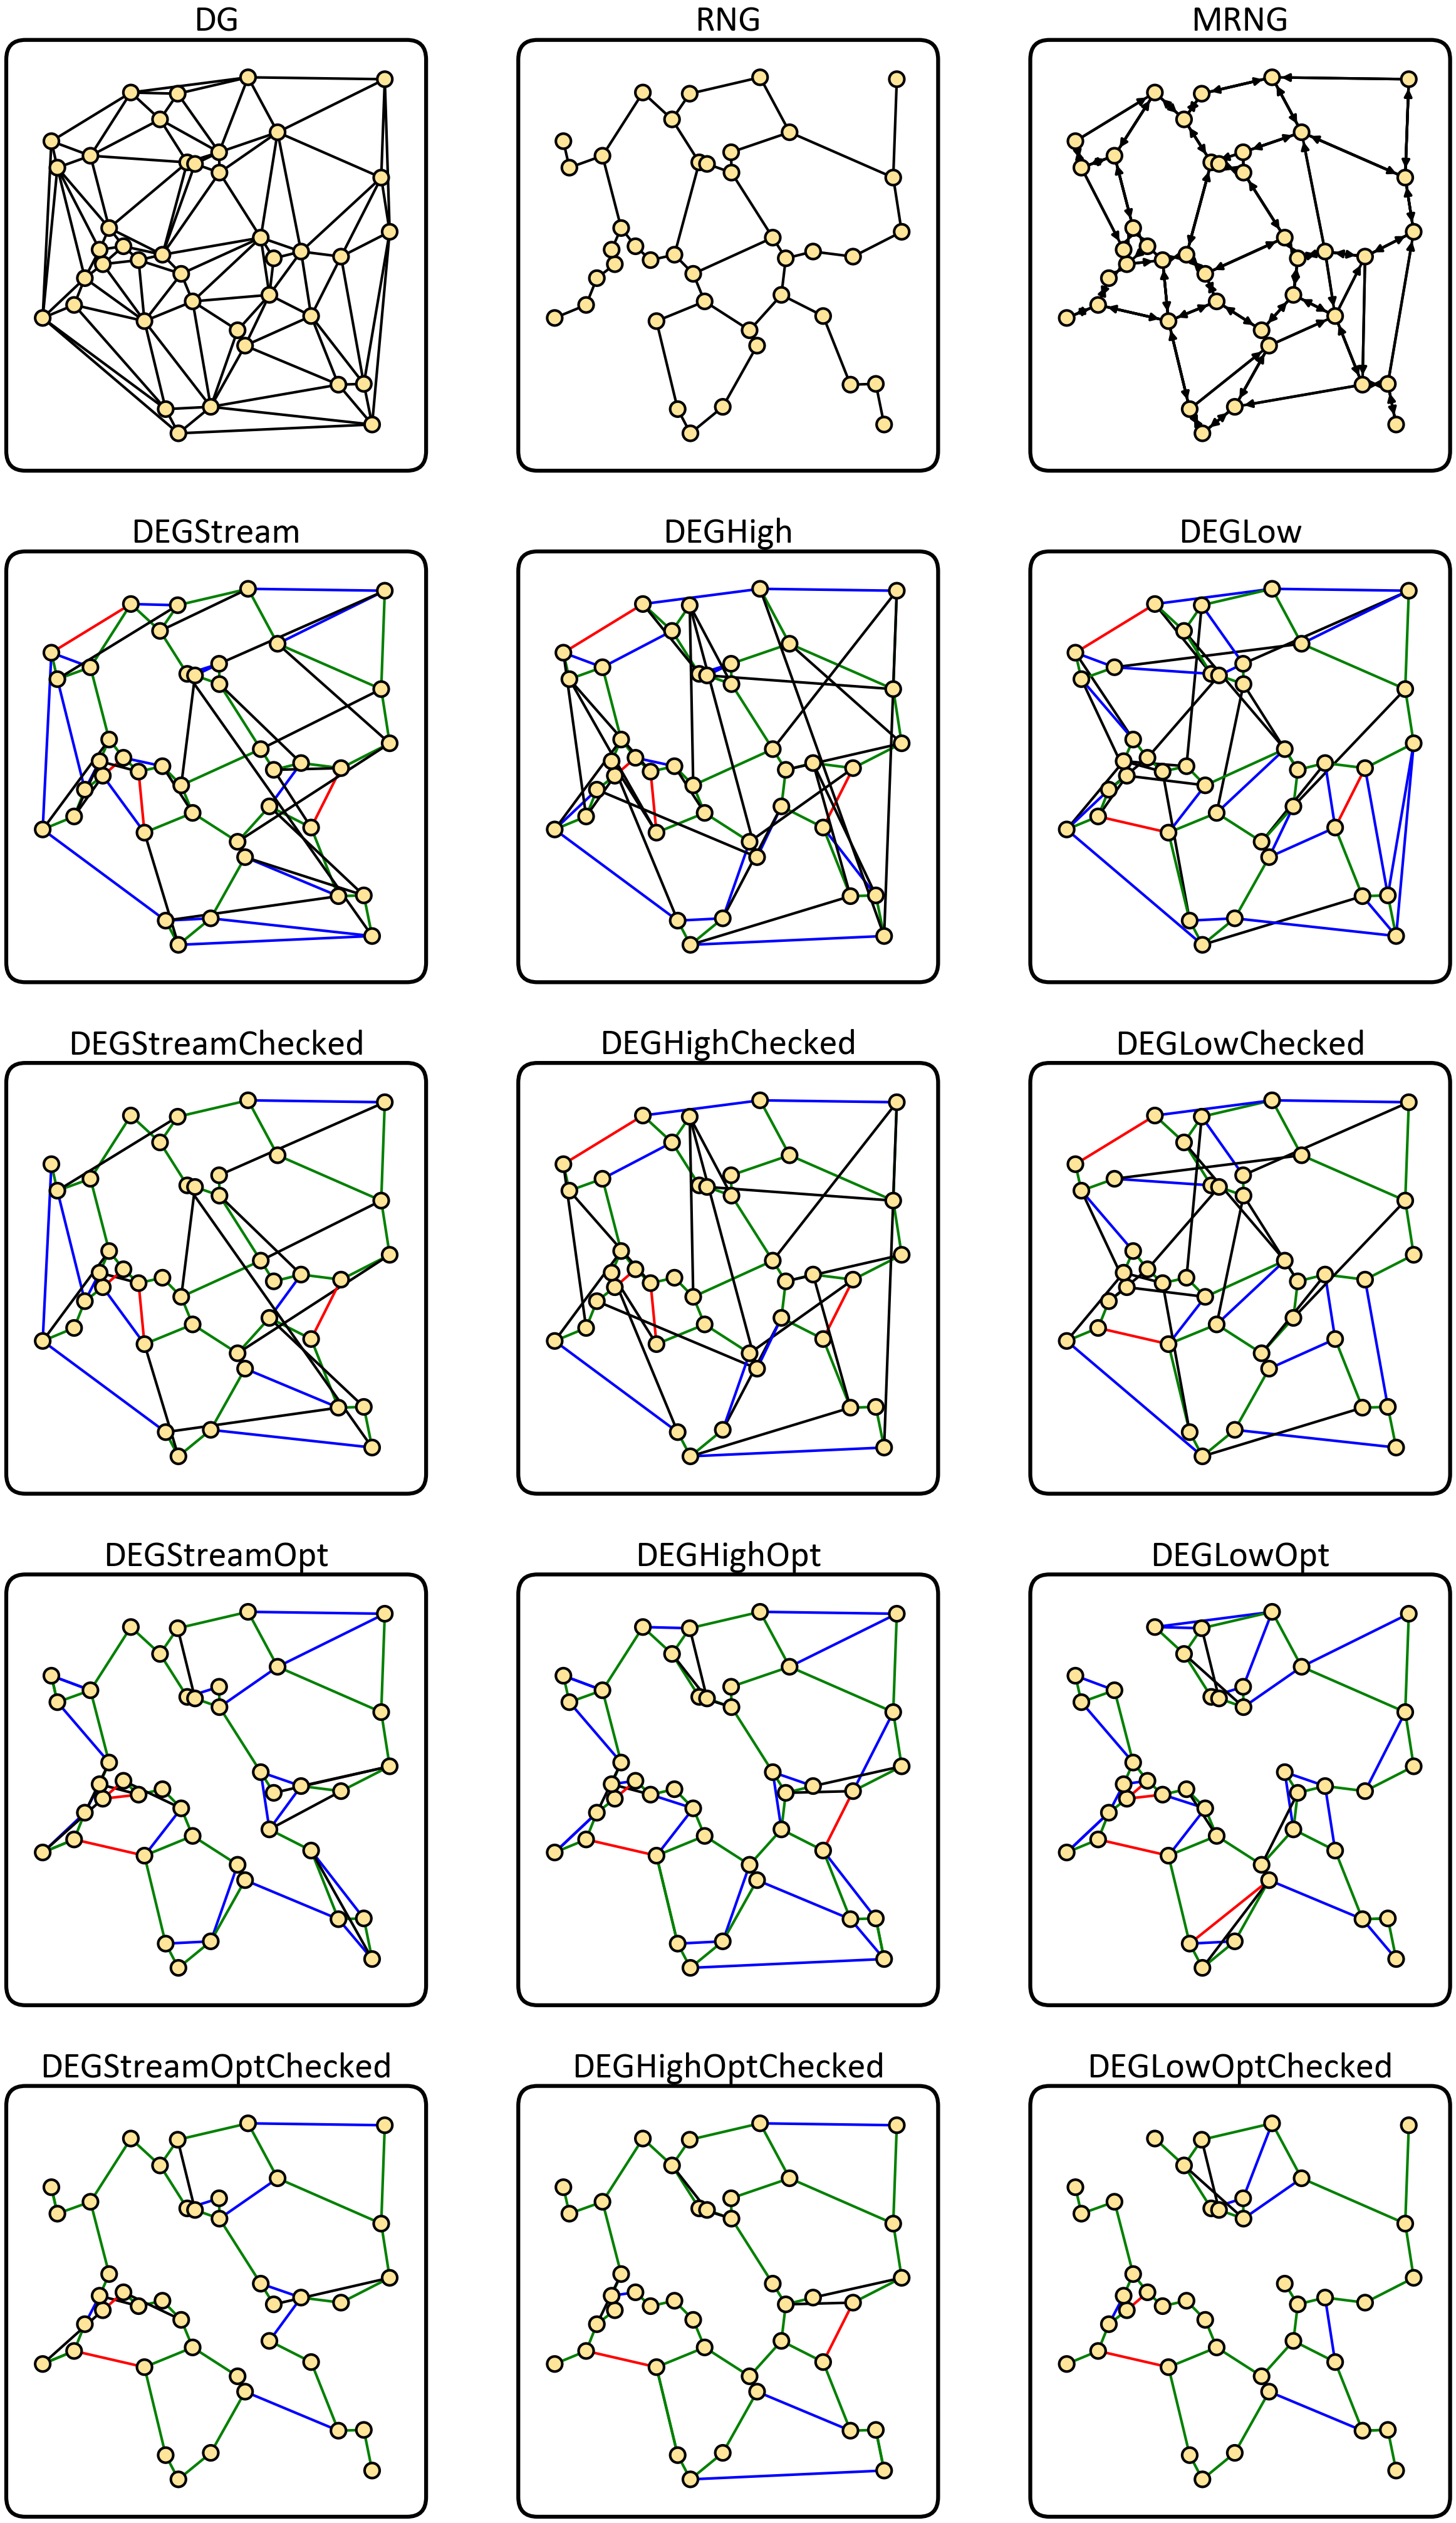

In [16]:
from graphs import GraphItem
from evaluate import color_overlapping_edges

def color_graph(g):
    colored_edges = g.edges.copy()
    color_overlapping_edges(by_kind[GraphKind.DG].edges, colored_edges, color="blue", inplace=True)
    color_overlapping_edges(by_kind[GraphKind.MRNG].edges, colored_edges, color="red", inplace=True, undirected=False)
    color_overlapping_edges(by_kind[GraphKind.RNG].edges, colored_edges, color="green", inplace=True)

    # Sync back to the GraphItem so plots reflect the updated colors
    return GraphItem(g.kind, g.title, False, g.vertices, colored_edges)

colored_graphs = [by_kind[GraphKind.DG], by_kind[GraphKind.RNG], by_kind[GraphKind.MRNG]]

# Add all DEG* graphs, colored
for kind, item in by_kind.items():
    if getattr(kind, "name", str(kind)).startswith("DEG"):
        colored_graphs.append(color_graph(item))

plot_graphs(vertices=coords, graphs=colored_graphs, bg_color="white", text_color="black", annotation_size=0, title_size=42, marker_size=300, border_color="black", edge_width=3, max_per_row=3, save_file="all_graphs_colored.svg")